<a href="https://colab.research.google.com/github/JoelAmaral/analise-imagens-medicas/blob/main/analise_imagens_medicas_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.


## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes          | RM            | Turma |
| :-----------------------      | :------------- | :-----: |
| Joel Firmino do Amaral Junior | RM 332554      | `15IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.
Note que as imagens de pneumonia bacteria e viral estão misturadas dentro da pasta ```PNEUMONIA```. É necessário separar as imagens manualmente tendo como base o sufixo. As imagens que terminal com ```_virus``` se referem a pneumoria viral e as que terminam com ```_bacteria``` se referem a pneumonia bacteriana.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**: 1478 imagens

## 4.2 Componentes obrigatórios

Todas as bibliotecas já estão instaladas no Google Colab.

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [7]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras import optimizers

import tensorflow.keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

> Você pode _montar_ o drive do Google Drive se precisar e quiser armazenar as imagens nesta plataforma. Como o Colab é efêmero, se você copiar os arquivos para o ambiente eles serão apagados depois do fim da sessão. Acesse [esta](https://medium.com/@maxwellcsm/colaboratory-acessando-os-arquivos-do-google-drive-d08ef9157dbf) referência para saber mais como o recurso funciona, inclusive recomenda-se essa abordagem de montar o próprio Google Drive.

Se não for utilizar o Google Drive, crie as pastas que serão utilizadas para armazenar as imagens.

### 4.3.1 Utilizando Google Drive

Se usar o Google Drive para armazenar as imagens utilize o comando abaixo para montar seu drive.
Você pode navegar pelas pastas pelo painel ao lado.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.3.2 Utilizando o armazenamento efêmero

Se optar pelo armazenamento efêmero você precisa enviar os arquivos de imagens (arrastar e soltar) para as pastas que deverão ser criadas pelo comando a seguir.

In [3]:
!mkdir raiox/
!mkdir raiox/normal
!mkdir raiox/pneumonia_bacteriana
!mkdir raiox/pneumonia_viral

Defina o nome da pasta onde contém as sub-pastas referente aos 3 tipos de classe. Se optar pelo armazenamento efêmero a pasta será ```raiox```. Se optar pelo Goolge Drive, indique o caminho da pasta.

In [8]:
## IMPLEMENTE
divisao_treino_validacao = 0.30
# nome_pasta_raiz_imagens = "./raiox/teste"

O caminho abaixo da pasta ```raiox``` pode ser alterado caso você opte por utilizar uma pasta específica do seu Google Drive. Neste caso, certifique que dentro delas tem as sub-pastas referentes as imagens normal, pneumonia bacteriana e viral.

In [9]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "./raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 901 images belonging to 3 classes.


In [36]:
val_generator = train_datagen.flow_from_directory(
    "./raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 385 images belonging to 3 classes.


In [37]:
train_generator.class_indices, val_generator.class_indices

({'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2},
 {'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [38]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: Rede neural convolucional que tem 50 camadas de profundidade, tem um tamanho de entrada de imagem de 224 por 224, é muito utilizada em tarefas de visão computacional como classificação de imagem, localização de objetos e detecção de objetos.

### Representação grafica da arquiterura ResNet-50



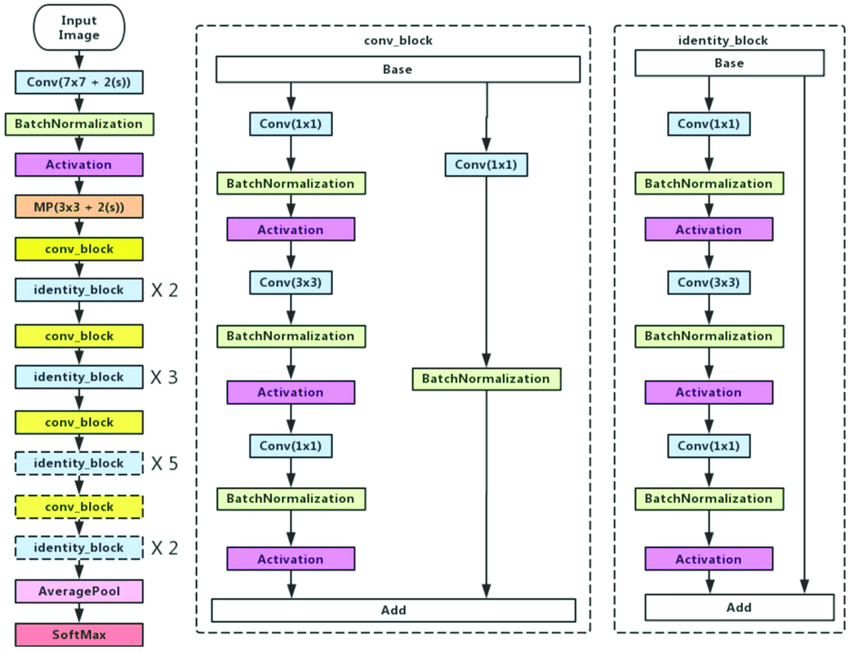

In [ ]:
from IPython.display import Image
Image('./imagens/Left-ResNet50-architecture-Blocks-with-dotted-line-represents-modules-that-might-be.png',width=800, height=500)

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [39]:
## IMPLEMENTE

qtde_classes = 3

In [40]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [42]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [44]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [46]:
# qtde_epocas = 25
#qtde_epocas = 50
qtde_epocas = 30

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [47]:
history = model.fit(train_generator, 
                    epochs=qtde_epocas, 
                    validation_steps=5, 
                    steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 53s 12s/step - loss: 0.9461 - precision_score: 0.5742 - recall_score: 0.4875 - f1_score: 0.5264 - val_loss: 0.9059 - val_precision_score: 0.6444 - val_recall_score: 0.5813 - val_f1_score: 0.6108
Epoch 2/30
5/5 [==============================] - 53s 12s/step - loss: 0.7009 - precision_score: 0.7494 - recall_score: 0.6750 - f1_score: 0.7101 - val_loss: 0.8208 - val_precision_score: 0.5370 - val_recall_score: 0.5000 - val_f1_score: 0.5177
Epoch 3/30
5/5 [==============================] - 53s 12s/step - loss: 0.5808 - precision_score: 0.7756 - recall_score: 0.7125 - f1_score: 0.7425 - val_loss: 0.6139 - val_precision_score: 0.7473 - val_recall_score: 0.7000 - val_f1_score: 0.7223
Epoch 4/30
5/5 [==============================] - 53s 12s/step - loss: 0.5400 - precision_score: 0.8337 - recall_score: 0.7875 - f1_score: 0.8095 - val_loss: 0.5852 - val_precision_score: 0.7070 - val_recall_score: 0.6625 - val_f1_score: 0.6838
Epoch 5/30
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

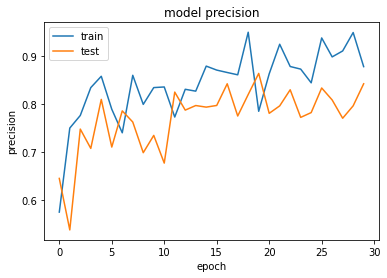

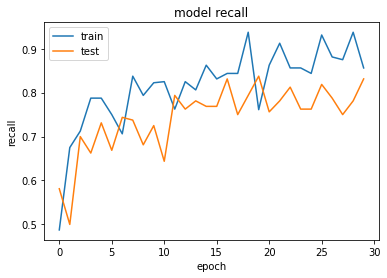

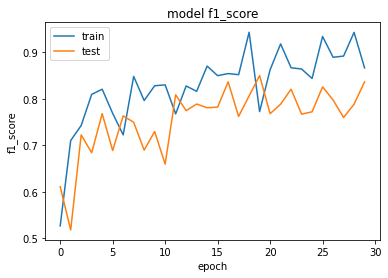

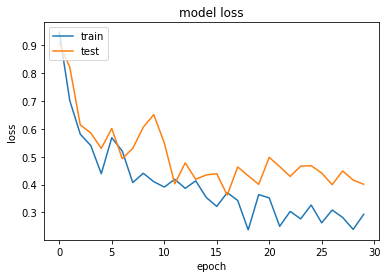

In [48]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: A precisão, sensibilidade e f1 score teve um comportamento crescente. A perda, conforme as épocas são executadas, apresenta valores decrescentes.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Epoch 30/30
5/5 [==============================] - 52s 12s/step - loss: 0.2932 - precision_score: 0.8775 - recall_score: 0.8562 - f1_score: 0.8665 - val_loss: 0.4010 - val_precision_score: 0.8417 - val_recall_score: 0.8313 - val_f1_score: 0.8364

> val_precision_score: 84,17%

> val_recall_score: 83,13%

> val_f1_score: 83,64%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: Rede neural convulucional também é chamada de modelo OxfordNet.
O número 16 refere-se que tem um total de 16 camadas que tem alguns pesos, treinado em dados imagenet
tem uma precisão de 92,7%.

### Imagem de exemplo da arquitetura VGG 16

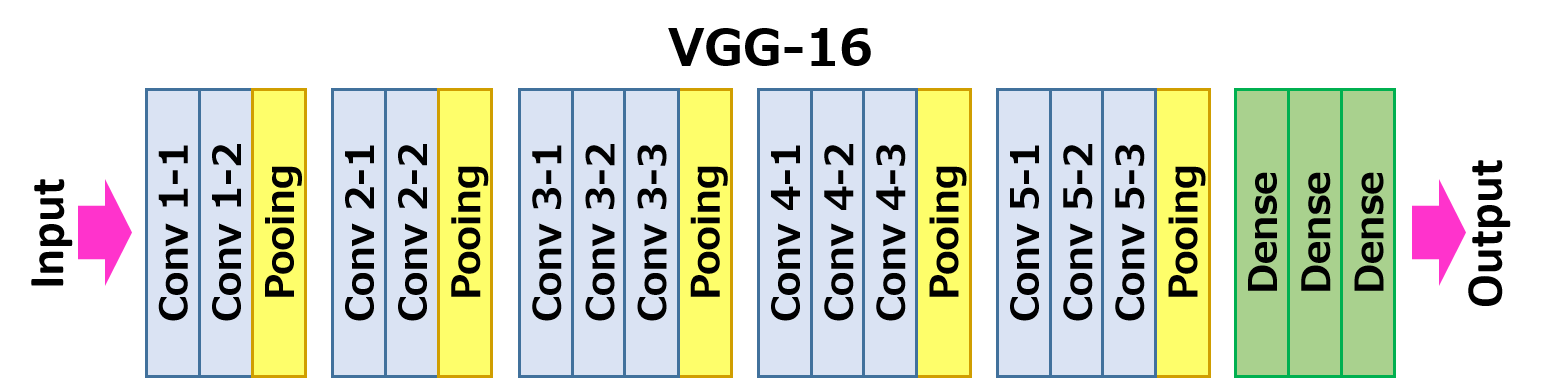

In [ ]:
from IPython.display import Image
Image('./imagens/VGG16.png',width=900, height=200)

In [49]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [50]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [51]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [52]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 150s 33s/step - loss: 3.8908 - precision_score: 0.3949 - recall_score: 0.3949 - f1_score: 0.3949 - val_loss: 2.9833 - val_precision_score: 0.3633 - val_recall_score: 0.3625 - val_f1_score: 0.3629
Epoch 2/30
5/5 [==============================] - 160s 36s/step - loss: 2.6276 - precision_score: 0.3767 - recall_score: 0.3668 - f1_score: 0.3716 - val_loss: 2.0679 - val_precision_score: 0.4907 - val_recall_score: 0.4875 - val_f1_score: 0.4891
Epoch 3/30
5/5 [==============================] - 161s 36s/step - loss: 1.6420 - precision_score: 0.6087 - recall_score: 0.5717 - f1_score: 0.5894 - val_loss: 1.0095 - val_precision_score: 0.6397 - val_recall_score: 0.6313 - val_f1_score: 0.6354
Epoch 4/30
5/5 [==============================] - 161s 36s/step - loss: 1.0065 - precision_score: 0.6429 - recall_score: 0.6408 - f1_score: 0.6419 - val_loss: 0.9136 - val_precision_score: 0.6671 - val_recall_score: 0.6625 - val_f1_score: 0.6648
Epoch 5/30
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

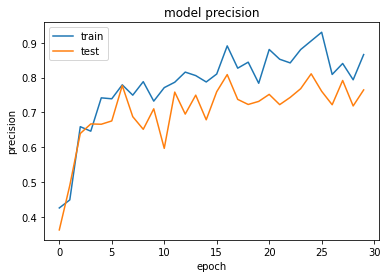

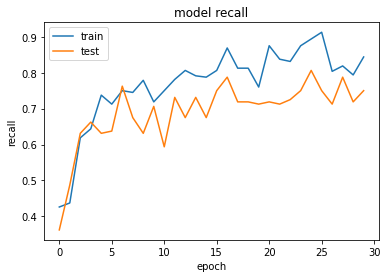

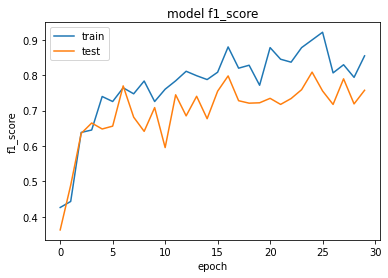

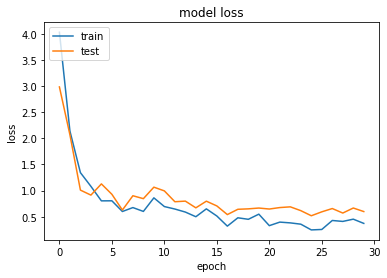

In [53]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Epoch 30/30
5/5 [==============================] - 160s 36s/step - loss: 0.3945 - precision_score: 0.8642 - recall_score: 0.8533 - f1_score: 0.8585 - val_loss: 0.5987 - val_precision_score: 0.7647 - val_recall_score: 0.7500 - val_f1_score: 0.7572

> valor de precisão: 76.47%  

> sensibilidade: 75.00%  

> pontuação de validação: 75.72%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: VGG19 uma das redes mais influentes porque reforçou a noção de que as CNNs precisam ter uma rede profunda de camadas para que essa representação de dados visuais possa funcionar melhor. , composto por 16 camadas convolucionais (com 5 camadas de pooling) e 3 camadas totalmente conectadas somando as 19 camadas. Para reduzir o número de parâmetros, é usado pequenos filtros 3 × 3 em todas as camadas convolucionais e é melhor a ser utilizado com sua taxa de erro de 7,3%.

### Imagem que representa a arquitetura VGG19 

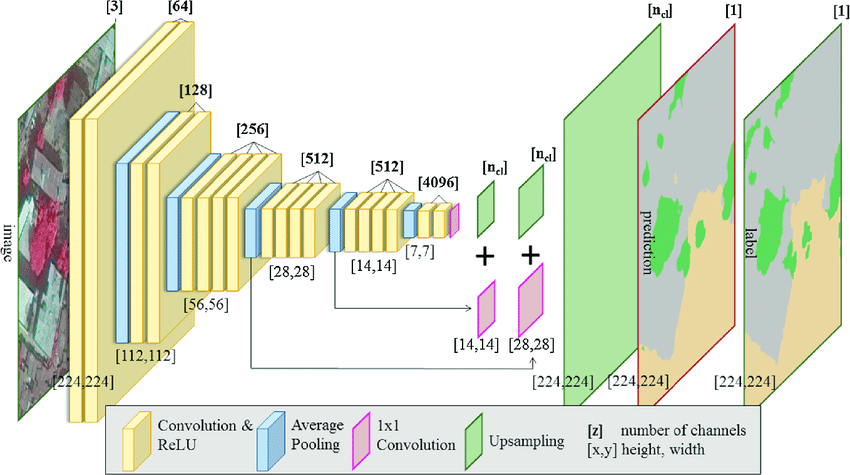

In [ ]:
from IPython.display import Image
Image('./imagens/VGG19.png',width=600, height=300)

In [54]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [55]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [56]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [57]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 204s 46s/step - loss: 4.7286 - precision_score: 0.3808 - recall_score: 0.3808 - f1_score: 0.3808 - val_loss: 2.8126 - val_precision_score: 0.4437 - val_recall_score: 0.4437 - val_f1_score: 0.4437
Epoch 2/30
5/5 [==============================] - 202s 46s/step - loss: 2.0431 - precision_score: 0.4815 - recall_score: 0.4701 - f1_score: 0.4756 - val_loss: 1.7923 - val_precision_score: 0.5177 - val_recall_score: 0.5125 - val_f1_score: 0.5151
Epoch 3/30
5/5 [==============================] - 203s 45s/step - loss: 1.3349 - precision_score: 0.5516 - recall_score: 0.5305 - f1_score: 0.5408 - val_loss: 1.1918 - val_precision_score: 0.6668 - val_recall_score: 0.6438 - val_f1_score: 0.6548
Epoch 4/30
5/5 [==============================] - 202s 45s/step - loss: 1.0874 - precision_score: 0.6532 - recall_score: 0.6511 - f1_score: 0.6521 - val_loss: 0.9768 - val_precision_score: 0.6754 - val_recall_score: 0.6625 - val_f1_score: 0.6688
Epoch 5/30
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

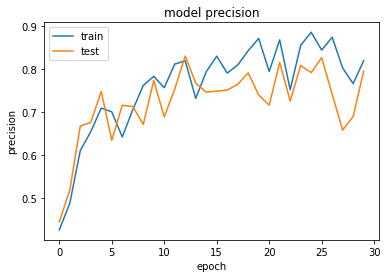

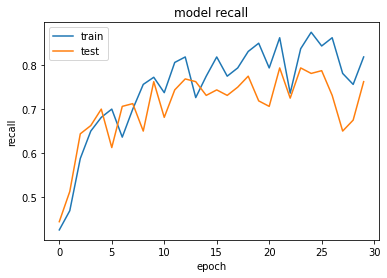

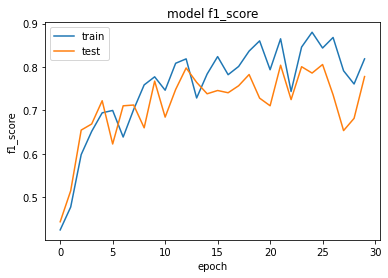

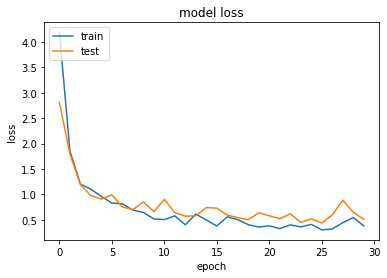

In [58]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:  Epoch 30/30
5/5 [==============================] - 201s 45s/step - loss: 0.4075 - precision_score: 0.7990 - recall_score: 0.7990 - f1_score: 0.7990 - val_loss: 0.5097 - val_precision_score: 0.7948 - val_recall_score: 0.7625 - val_f1_score: 0.778



## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | XX %     | XX %          | XX %     |
| VGG16    | XX %     | XX %          | XX %     |
| VGG19    | XX %     | XX %          | XX %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

## 4.8 Abordagem adicional (obrigatório)

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [59]:
#IMPLEMENTE
from keras.applications.inception_v3 import InceptionV3

conv_base = InceptionV3(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [60]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [61]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [62]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/30
5/5 [==============================] - 41s 8s/step - loss: 35.6647 - precision_score: 0.3438 - recall_score: 0.3438 - f1_score: 0.3438 - val_loss: 29.0411 - val_precision_score: 0.3750 - val_recall_score: 0.3750 - val_f1_score: 0.3750
Epoch 2/30
5/5 [==============================] - 35s 8s/step - loss: 19.9826 - precision_score: 0.3716 - recall_score: 0.3716 - f1_score: 0.3716 - val_loss: 12.9462 - val_precision_score: 0.4875 - val_recall_score: 0.4875 - val_f1_score: 0.4875
Epoch 3/30
5/5 [==============================] - 35s 8s/step - loss: 11.0937 - precision_score: 0.5495 - recall_score: 0.5495 - f1_score: 0.5495 - val_loss: 15.2840 - val_precision_score: 0.4938 - val_recall_score: 0.4938 - val_f1_score: 0.4937
Epoch 4/30
5/5 [==============================] - 35s 8s/step - loss: 9.8719 - precision_score: 0.5487 - recall_score: 0.5487 - f1_score: 0.5487 - val_loss: 10.9101 - val_precision_score: 0.5500 - val_recall_score: 0.5500 - val_f1_score: 0.5500
Epoch 5/30
5/5 [=

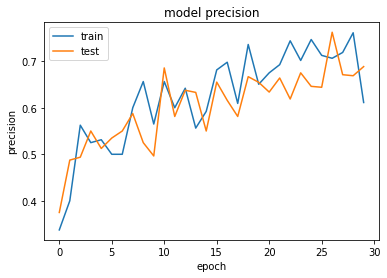

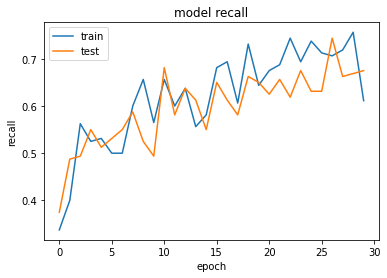

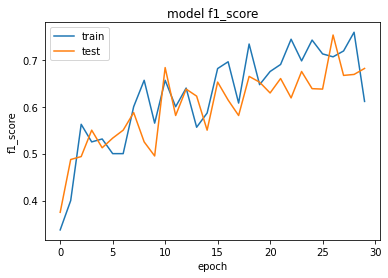

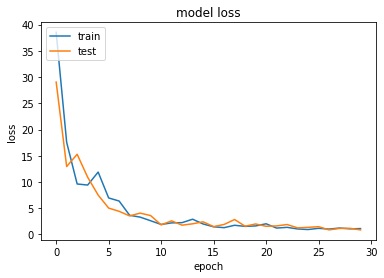

In [63]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem adicional

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: